# Car Price Prediction Using SVR

In [41]:
import numpy as np
import pandas as pd
import missingno as m
import plotly.express as px

### Reading the Dataset

In [42]:
df= pd.read_csv("Car details v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<AxesSubplot:>

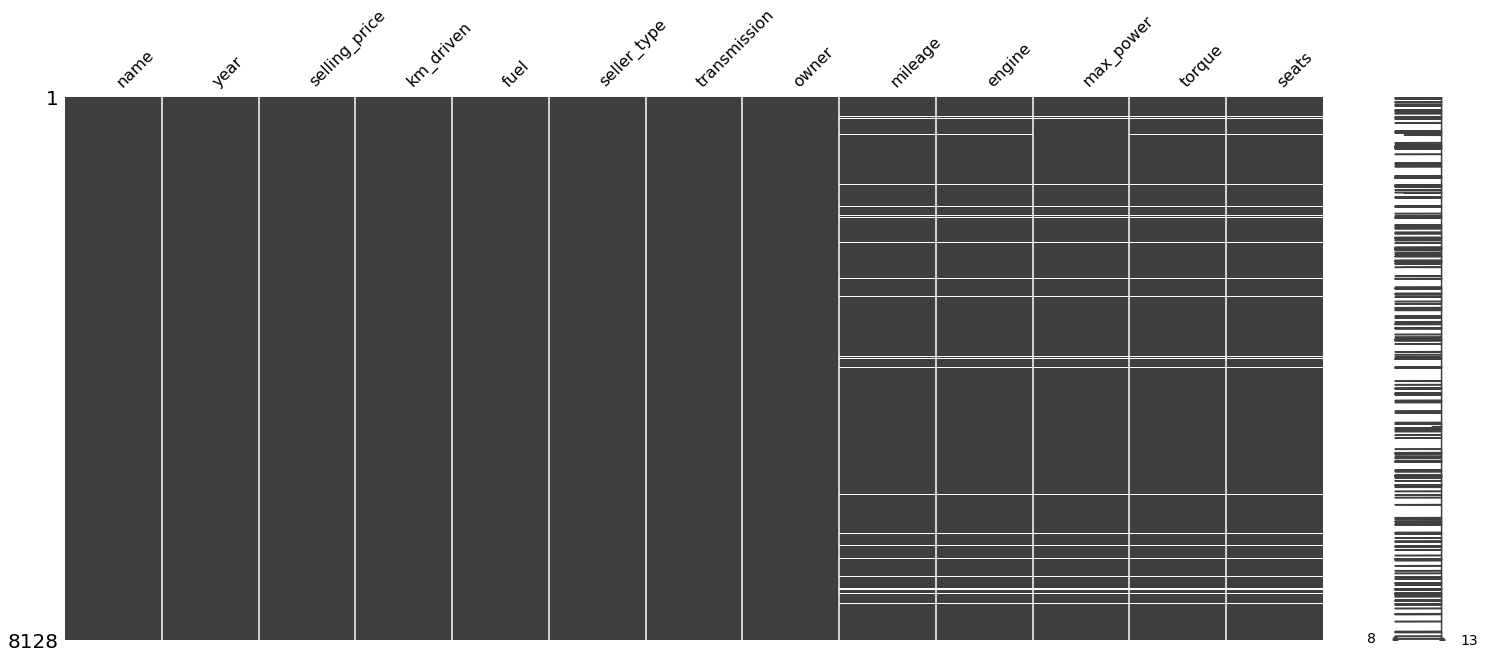

In [43]:
m.matrix(df)

In [44]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [45]:
df = df.drop_duplicates(subset=['mileage','engine','max_power','torque','seats'])

In [46]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          2
engine           2
max_power        1
torque           3
seats            2
dtype: int64

<AxesSubplot:>

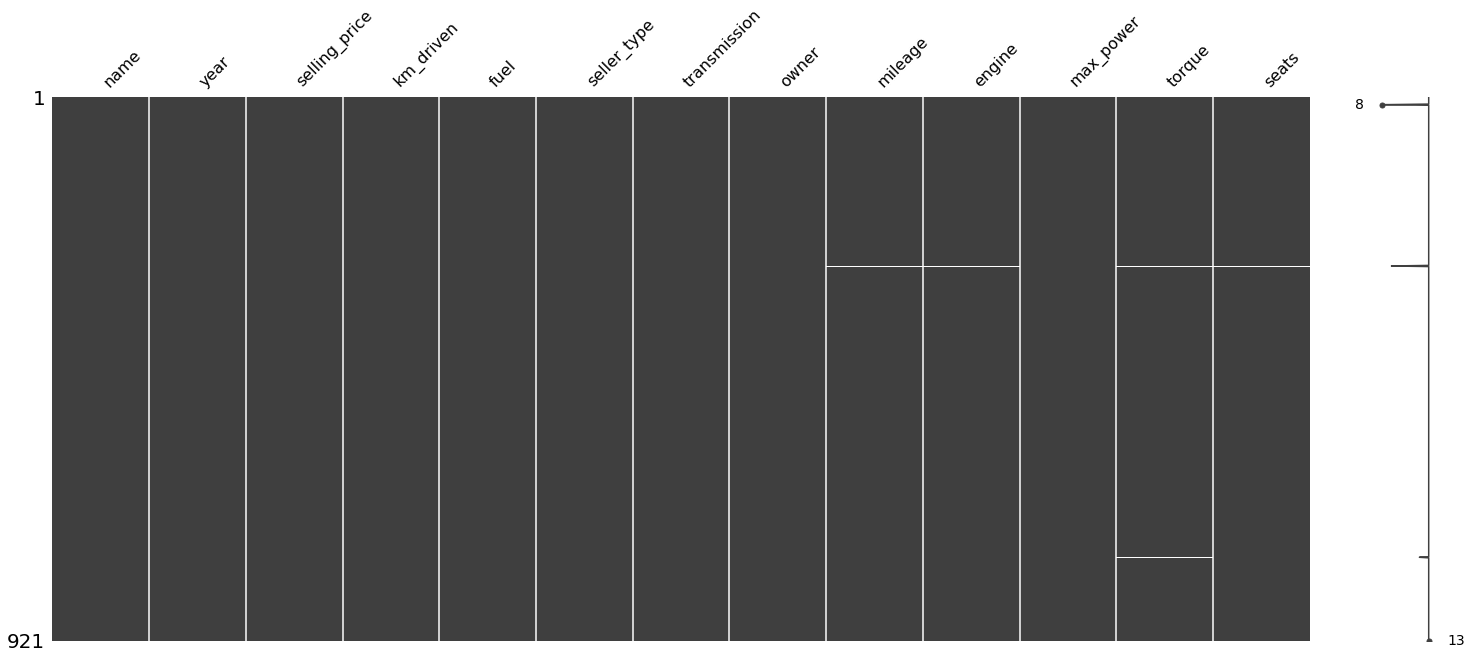

In [47]:
m.matrix(df)

In [48]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [49]:
df['name'] = df.name.str.split().str.get(0)
df['owner'] = df.owner.str.split().str.get(0)
df['mileage'] = df.mileage.str.split().str.get(0)
df['engine'] = df.engine.str.split().str.get(0)
df['max_power'] = df.max_power.str.split().str.get(0)
df['torque'] = df.torque.str.split().str.get(0)

In [50]:
i = 4933
df = df.drop(i)

In [51]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First,23.4,1248,74,190Nm@,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second,21.14,1498,103.52,250Nm@,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third,17.7,1497,78,12.7@,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First,23.0,1396,90,22.4,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First,16.1,1298,88.2,11.5@,5.0


In [52]:
df = df.drop(columns='torque')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First,16.1,1298,88.2,5.0


In [53]:
df['mileage'] = pd.to_numeric(df['mileage'])
df['engine'] = pd.to_numeric(df['engine'])
df['max_power'] = pd.to_numeric(df['max_power'])

In [54]:
df = df.drop_duplicates()
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          2
engine           2
max_power        1
seats            2
dtype: int64

In [55]:
df['mileage'].fillna((df['mileage'].mean()), inplace=True)
df['engine'].fillna((df['engine'].mean()), inplace=True)
df['seats'].fillna((df['seats'].mean()), inplace=True)
df['max_power'].fillna((df['max_power'].mean()), inplace=True)

In [56]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

## Data Analysing 

In [57]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First,16.10,1298.0,88.20,5.0


# EDA

## Univariate Analysis

In [92]:
fig = px.histogram(df, x="year",title='Year')
fig.show()

In [93]:
fig = px.histogram(df, x="engine",title='Engine Power')
fig.show()

In [95]:
fig = px.violin(df, y="selling_price", box=True,title='Selling Price', # draw box plot inside the violin
                 # can be 'outliers', or False
               )
fig.show()

## Bivariate Analysis

In [96]:
fig = px.box(df, x="name", y="selling_price",title='Name vs Selling Price')
fig.show()

In [97]:
fig = px.box(df, x="fuel", y="selling_price",points='all',title='Fuel Type vs Selling Price')
fig.show()

In [98]:
fig = px.box(df, x="owner", y="selling_price",title='Owner vs Selling Price')
fig.show()

## Multivariate Analysis

In [99]:
fig = px.scatter(df, x='engine', y='selling_price', color='max_power',title='Engine vs Selling Price vs Maximum Power')
fig.show()

In [100]:
fig = px.scatter(df, x='mileage', y='selling_price', color='km_driven',title='Mileage vs Selling Price vs Total Km Driven')
fig.show()

In [101]:
fig = px.scatter(df, x="mileage", y="engine", color="max_power",
                 size='seats', hover_data=['selling_price'],title='Mileage vs Engine vs Maximum Power vs Seats vs Selling Price')
fig.show()

# Heatmap

<AxesSubplot:>

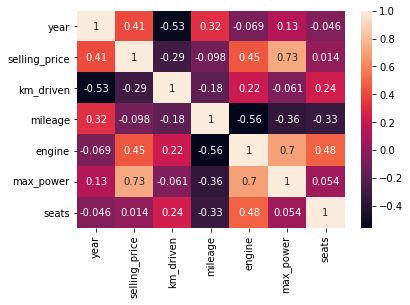

In [102]:
import seaborn
seaborn.heatmap(df.corr(),annot=True)

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_vars=['year','selling_price','km_driven','mileage','engine','max_power','seats']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [25]:
df1 = pd.get_dummies(df)

In [26]:
df1.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,name_Ambassador,name_Ashok,name_Audi,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth,owner_Second,owner_Test,owner_Third
0,0.116093,-0.313250,1.533722,1.283971,-0.691700,-0.701840,-0.459941,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,0.116093,-0.401471,0.998316,0.779240,-0.234788,-0.038475,-0.459941,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,-1.839162,-0.635259,1.418243,0.010977,-0.236615,-0.611953,-0.459941,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,-0.861534,-0.561373,1.145290,1.194638,-0.421208,-0.342292,-0.459941,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,-1.594755,-0.666137,0.998316,-0.346355,-0.600318,-0.382742,-0.459941,0,0,0,...,0,1,0,0,1,1,0,0,0,0


In [27]:
df2 = df1
df3 = df1

In [28]:
df2.drop(columns=['selling_price'])

,year,km_driven,mileage,engine,max_power,seats,name_Ambassador,name_Ashok,name_Audi,name_BMW,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First,owner_Fourth,owner_Second,owner_Test,owner_Third
0,0.116093,1.533722,1.283971,-0.691700,-0.701840,-0.459941,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,0.116093,0.998316,0.779240,-0.234788,-0.038475,-0.459941,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,-1.839162,1.418243,0.010977,-0.236615,-0.611953,-0.459941,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,-0.861534,1.145290,1.194638,-0.421208,-0.342292,-0.459941,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,-1.594755,0.998316,-0.346355,-0.600318,-0.382742,-0.459941,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8045,0.849314,-1.097727,0.495608,-0.302411,0.073434,-0.459941,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
8058,0.849314,-1.353273,-0.234689,0.313508,1.623982,-0.459941,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
8074,-0.128314,-0.261464,-0.254788,-0.073954,-0.045666,-0.459941,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8081,-2.083569,0.578389,-1.262017,-0.243926,-0.117575,-0.459941,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [29]:
df1.to_csv('data.csv')

# Divide into X and Y

In [30]:
X = df2.values
y = df3.pop('selling_price')

In [31]:
X

array([[ 0.11609328, -0.31324964,  1.53372245, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11609328, -0.40147143,  0.99831595, ...,  1.        ,
         0.        ,  0.        ],
       [-1.83916192, -0.63525918,  1.41824262, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.12831362, -0.48417936, -0.26146405, ...,  0.        ,
         0.        ,  1.        ],
       [-2.08356882, -0.68819225,  0.57838928, ...,  1.        ,
         0.        ,  0.        ],
       [-0.37272052, -0.58894274,  0.17668743, ...,  0.        ,
         0.        ,  1.        ]])

In [32]:
y=y.values
y

array([-3.13249644e-01, -4.01471434e-01, -6.35259177e-01, -5.61373428e-01,
       -6.66136803e-01, -3.24277368e-01, -7.03631064e-01, -7.59872455e-01,
       -4.23526881e-01, -5.88942737e-01, -2.58111026e-01, -7.08042153e-01,
       -5.00720947e-01, -5.88942737e-01, -6.10998185e-01, -3.68388263e-01,
        4.84596933e-02, -6.44081356e-01, -5.96119991e-02, -6.17614819e-01,
        2.38136541e-01, -2.30541717e-01, -1.47833789e-01, -2.58111026e-01,
       -1.75403098e-01, -5.06234809e-01, -4.78665500e-01, -5.28291359e-01,
       -7.06397228e-02, -6.44081356e-01, -4.47338054e-03, -4.45582329e-01,
       -4.05882524e-01,  4.57588243e-01, -6.44081356e-01, -3.40818954e-01,
        1.50632477e+00,  2.10567232e-01, -3.40818954e-01, -6.51258609e-02,
       -3.79415987e-01,  8.44661345e-01, -3.75565517e-02,  7.89522726e-01,
       -3.40818954e-01,  3.92524673e-01, -1.47833789e-01,  1.27859304e-01,
       -2.30541717e-01,  1.01007720e+00,  2.38136541e-01,  1.12035444e+00,
        9.43910858e-01,  

# Model Building -  Support Vector Regressor

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [34]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [83]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(data)

[[-2.96e-01 -3.08e-01]
 [ 1.21e-01  1.28e-01]
 [ 3.74e-01  4.04e-01]
 [ 2.49e+00  2.77e+00]
 [-2.47e-01 -2.58e-01]
 [-3.57e-01 -2.58e-01]
 [-1.75e-01 -2.03e-01]
 [-6.95e-01 -6.11e-01]
 [-8.99e-02 -6.51e-02]
 [-2.62e-01 -4.46e-01]
 [ 1.63e-01  1.83e-01]
 [-6.38e-01 -6.00e-01]
 [-3.91e-01 -2.80e-01]
 [ 8.04e-01  7.90e-01]
 [-3.46e-01 -2.69e-01]
 [ 1.07e+00  9.28e-01]
 [-2.32e-01 -3.51e-01]
 [-1.82e-01  1.76e-02]
 [-4.18e-01 -3.30e-01]
 [-4.74e-01 -5.34e-01]
 [ 3.79e-01  3.48e-01]
 [-6.81e-01 -6.44e-01]
 [-1.23e-01 -3.57e-01]
 [ 2.30e-03 -1.48e-01]
 [-2.46e-01 -1.15e-01]
 [-4.51e-01 -3.13e-01]
 [-4.71e-01 -6.99e-01]
 [-4.33e-01 -3.79e-01]
 [-1.87e-01 -2.58e-01]
 [ 1.47e+00  1.40e+00]
 [-8.70e-02 -1.09e-01]
 [-5.57e-03 -1.55e-02]
 [ 5.47e-02  1.28e-01]
 [ 2.18e-01  1.83e-01]
 [ 9.14e-01  9.11e-01]
 [-3.97e-01 -2.31e-01]
 [-4.40e-01 -3.57e-01]
 [-5.29e-01 -5.89e-01]
 [-5.01e-01 -5.01e-01]
 [-7.24e-01 -7.54e-01]
 [-5.48e-01 -5.17e-01]
 [-6.47e-01 -6.22e-01]
 [ 5.01e-02 -5.96e-02]
 [-5.35e-01

# Model Accuracy

In [107]:
from sklearn.metrics import r2_score,mean_squared_error
import math
print("R Square - ",r2_score(y_test, y_pred))
print("Mean Square Error - ",mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error - ",rmse)

R Square -  0.9618668467815006
Mean Square Error -  0.027834351176871563
Root Mean Square Error -  0.16683630053699813


In [85]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'y_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')

In [86]:
dataset = pd.read_csv('accuracy.csv')

In [87]:
dataset

,Unnamed: 0,y_test,y_pred
0,0,-0.296496,-0.307736
1,1,0.120768,0.127859
2,2,0.374162,0.403552
3,3,2.489149,2.774513
4,4,-0.247179,-0.258111
...,...,...,...
271,271,0.962909,1.010077
272,272,0.173662,0.127859
273,273,-0.459368,-0.500721
274,274,-0.155463,-0.285680


# Actual vs Predicted Data Plotting  

In [91]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_pred'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=2)))


# This SVR model an predict Car Price with an Accuracy of 96%